# ***NASA asteroid_classification***

In [112]:
import pandas as pd
a= pd.read_csv('/content/nasa.csv')

In [113]:
first_5_rows = a.head(5)
print(first_5_rows)

   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762        

In [114]:
print(a.shape)

(4687, 40)


In [115]:
print(a.columns)

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')


In [116]:
columns_to_keep = ['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Relative Velocity km per hr',
                   'Miss Dist.(kilometers)',
                   'Absolute Magnitude', 'Hazardous']

a_new = a[columns_to_keep]
print(a_new)

      Est Dia in KM(min)  Est Dia in KM(max)  Relative Velocity km per hr  \
0               0.127220            0.284472                 22017.003799   
1               0.146068            0.326618                 65210.346095   
2               0.231502            0.517654                 27326.560182   
3               0.008801            0.019681                 40225.948191   
4               0.127220            0.284472                 35426.991794   
...                  ...                 ...                          ...   
4682            0.044112            0.098637                 79755.354273   
4683            0.006089            0.013616                 11610.539577   
4684            0.076658            0.171412                 25889.910626   
4685            0.116026            0.259442                 40867.522309   
4686            0.400641            0.895860                129408.666253   

      Miss Dist.(kilometers)  Absolute Magnitude  Hazardous  
0            

In [117]:
print(a_new.dtypes)

Est Dia in KM(min)             float64
Est Dia in KM(max)             float64
Relative Velocity km per hr    float64
Miss Dist.(kilometers)         float64
Absolute Magnitude             float64
Hazardous                         bool
dtype: object


In [118]:
print(a_new.isnull().sum())

Est Dia in KM(min)             0
Est Dia in KM(max)             0
Relative Velocity km per hr    0
Miss Dist.(kilometers)         0
Absolute Magnitude             0
Hazardous                      0
dtype: int64


In [119]:
a_new['Hazardous'] = a_new['Hazardous'].replace({True: 1, False: 0})

<ipython-input-119-b2567db22496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_new['Hazardous'] = a_new['Hazardous'].replace({True: 1, False: 0})


In [120]:
y=a_new['Hazardous']
print("THE TARGET VAIRIABLE")
print(y)

THE TARGET VAIRIABLE
0       1
1       0
2       1
3       0
4       1
       ..
4682    0
4683    0
4684    0
4685    0
4686    0
Name: Hazardous, Length: 4687, dtype: int64


In [121]:
class_0_count = len(a_new[a_new['Hazardous'] == 0])
class_1_count = len(a_new[a_new['Hazardous'] == 1])
print(f'Number of rows with target variable equal to 0: {class_0_count}')
print(f'Number of rows with target variable equal to 1: {class_1_count}')

Number of rows with target variable equal to 0: 3932
Number of rows with target variable equal to 1: 755


In [122]:
x=a_new.drop('Hazardous',axis=1)
print("FEATURES")
print(x)

FEATURES
      Est Dia in KM(min)  Est Dia in KM(max)  Relative Velocity km per hr  \
0               0.127220            0.284472                 22017.003799   
1               0.146068            0.326618                 65210.346095   
2               0.231502            0.517654                 27326.560182   
3               0.008801            0.019681                 40225.948191   
4               0.127220            0.284472                 35426.991794   
...                  ...                 ...                          ...   
4682            0.044112            0.098637                 79755.354273   
4683            0.006089            0.013616                 11610.539577   
4684            0.076658            0.171412                 25889.910626   
4685            0.116026            0.259442                 40867.522309   
4686            0.400641            0.895860                129408.666253   

      Miss Dist.(kilometers)  Absolute Magnitude  
0              

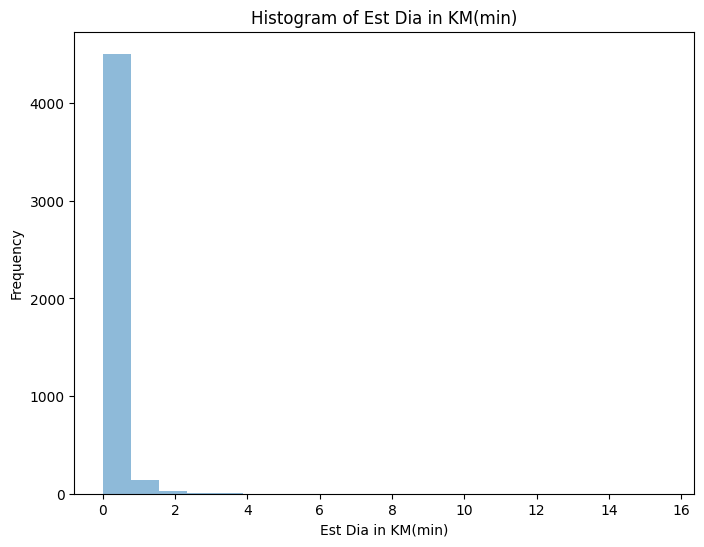

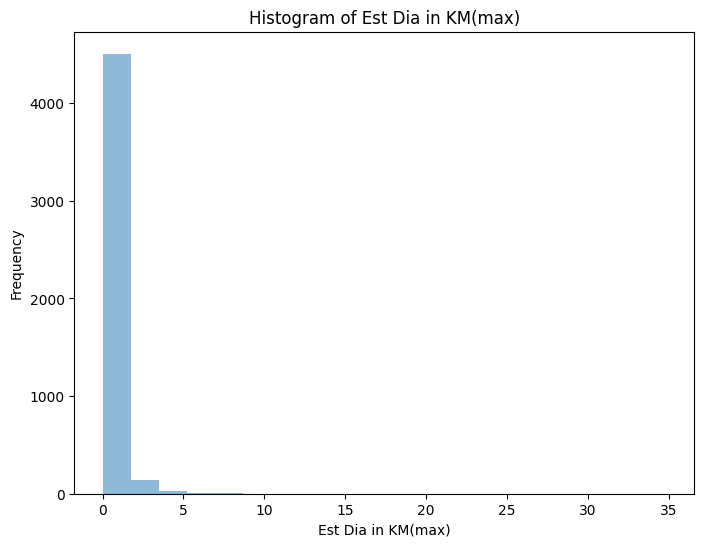

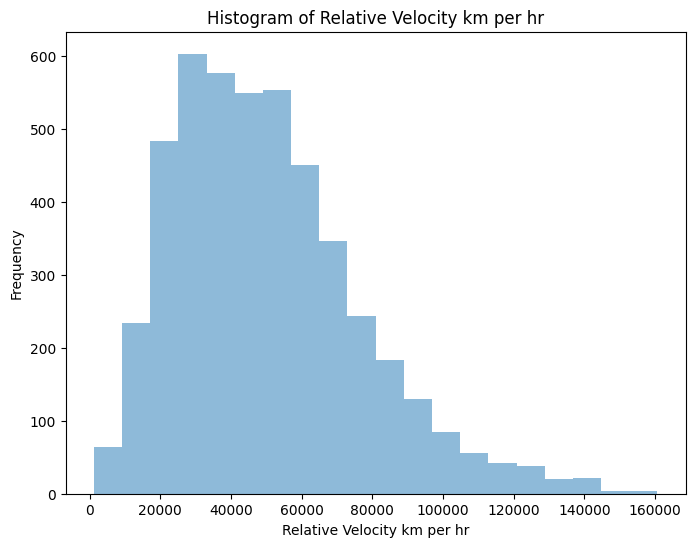

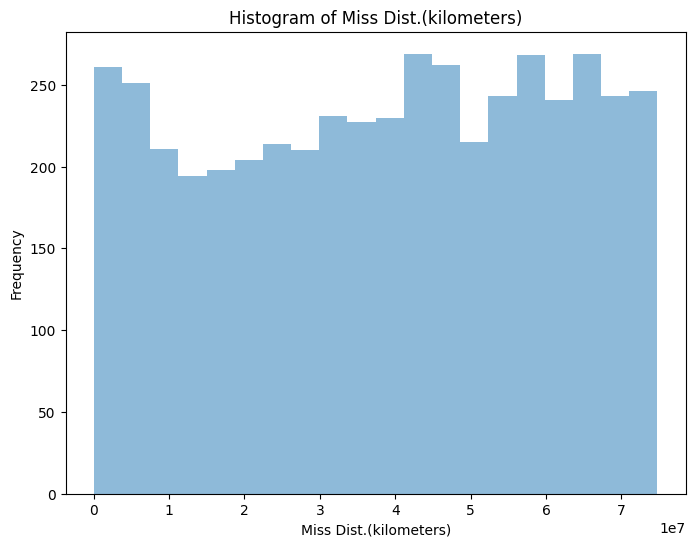

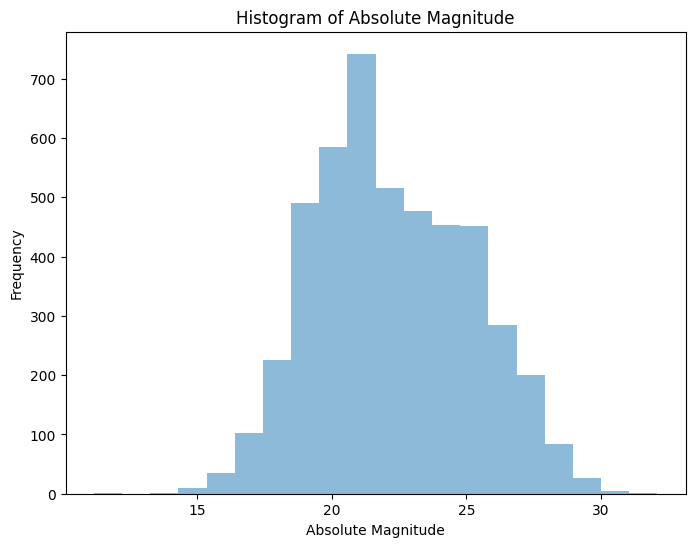

In [123]:
import matplotlib.pyplot as plt
for feature in x.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(x[feature], bins=20, alpha=0.5)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

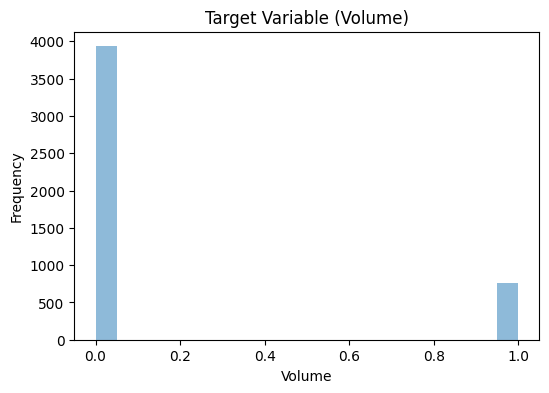

In [124]:

# Plot histogram for the target variable
plt.figure(figsize=(6, 4))
plt.hist(a_new['Hazardous'], bins=20, alpha=0.5)
plt.xlabel('Volume')
plt.ylabel("Frequency")
plt.title("Target Variable (Volume)")
plt.show()

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [126]:
print(x_train.shape,y_train.shape)

(3280, 5) (3280,)


In [127]:
print(x_test.shape,y_test.shape)

(1407, 5) (1407,)


In [128]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [129]:
#svm model
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)

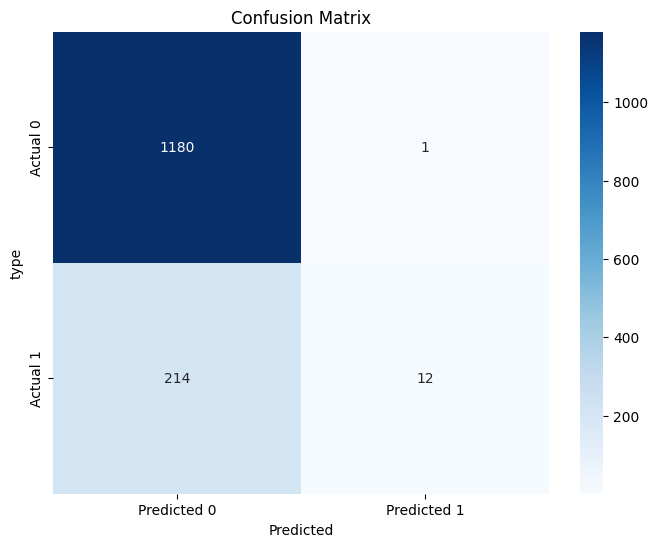

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()

In [131]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy using SVM model:", accuracy)

Accuracy using SVM model: 0.8471926083866382


In [132]:
from sklearn.metrics import classification_report

svm_report=classification_report(y_test, y_pred,zero_division=0)

print("SVM Classification Report:\n",svm_report)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1181
           1       0.92      0.05      0.10       226

    accuracy                           0.85      1407
   macro avg       0.88      0.53      0.51      1407
weighted avg       0.86      0.85      0.79      1407



In [133]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using logistic regression:', accuracy)

Accuracy using logistic regression: 0.8400852878464818


In [134]:
print('\nlogistic regression Classification Report:')
print(classification_report(y_test, y_pred))


logistic regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1181
           1       0.52      0.07      0.12       226

    accuracy                           0.84      1407
   macro avg       0.68      0.53      0.51      1407
weighted avg       0.79      0.84      0.78      1407



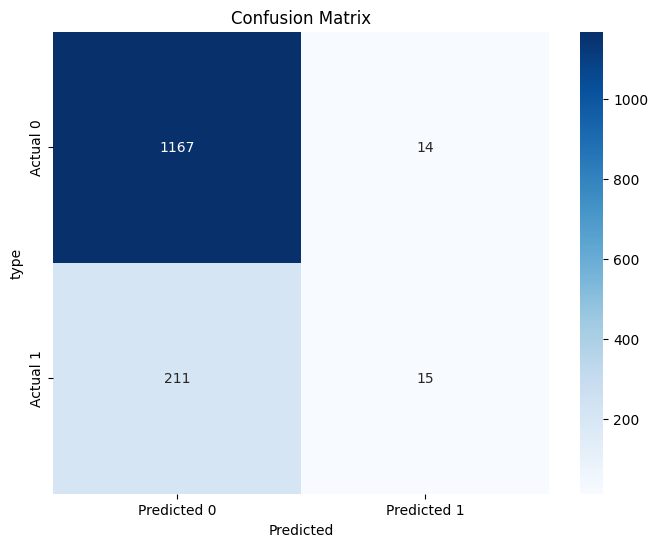

In [135]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()

In [136]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
k_values = [1,3,5,7,9,11,13,15,17,19]
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)

[0.8116560056858564, 0.8265813788201848, 0.8400852878464818, 0.8407960199004975, 0.84363894811656, 0.845771144278607, 0.8450604122245914, 0.8486140724946695, 0.8521677327647477, 0.8542999289267946]


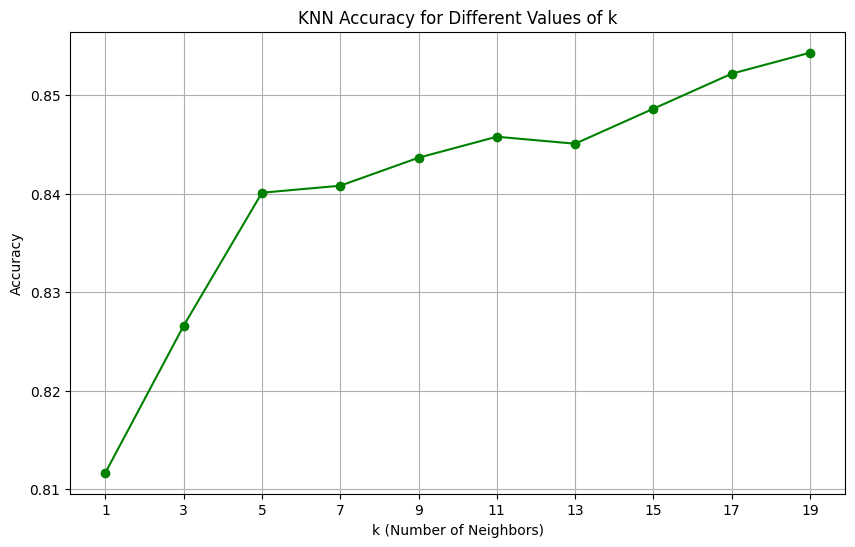

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='g')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [138]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k = 19  # The value of k you have chosen

knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using knn model with k={best_k}: {accuracy}")

print('\nKNN Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy using knn model with k=19: 0.8542999289267946

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1181
           1       0.70      0.16      0.27       226

    accuracy                           0.85      1407
   macro avg       0.78      0.58      0.59      1407
weighted avg       0.83      0.85      0.81      1407



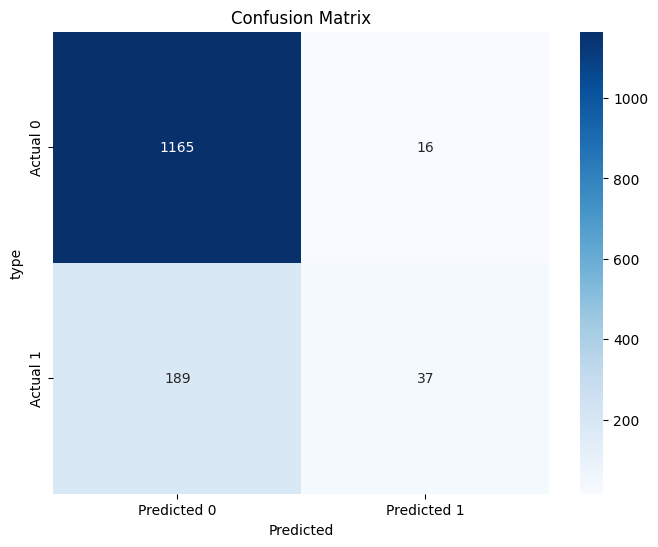

In [139]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()

In [140]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('\ndecision tress Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8329779673063256

decision tress Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1181
           1       0.48      0.43      0.45       226

    accuracy                           0.83      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.83      0.83      0.83      1407



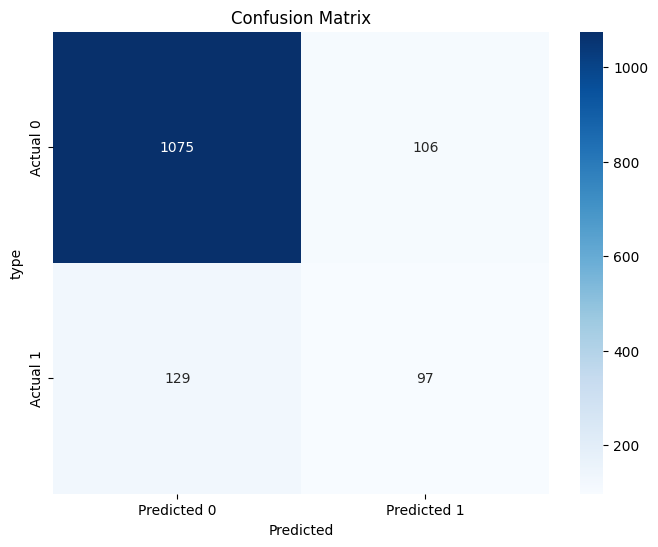

In [141]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()

In [142]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rfc}')

Accuracy: 0.84363894811656


In [143]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1181
           1       0.52      0.30      0.38       226

    accuracy                           0.84      1407
   macro avg       0.70      0.62      0.65      1407
weighted avg       0.82      0.84      0.83      1407



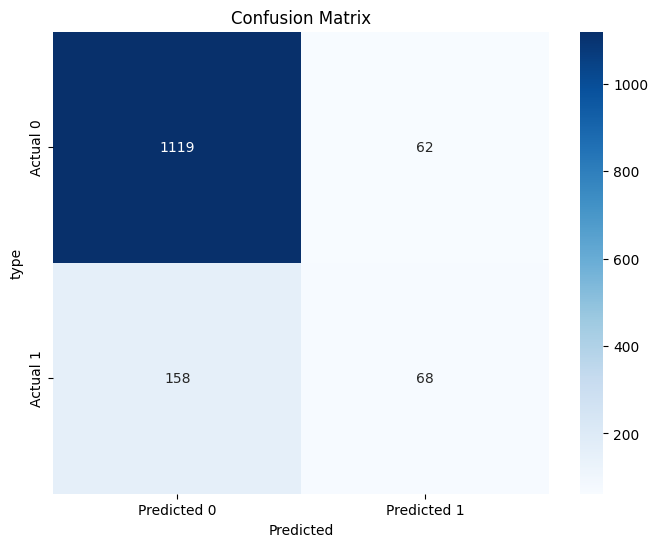

In [144]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Predicted {i}' for i in set(y)],
            yticklabels=[f'Actual {i}' for i in set(y)])
plt.xlabel('Predicted')
plt.ylabel('type')
plt.title('Confusion Matrix')
plt.show()